# 삼성전자 주가 예측

https://dacon.io/codeshare/2570

## Step 0 데이터 수집 : Yahoo Finance 데이터 불러오기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

samsung_df = yf.download('005930.KS',
                         start='2020-01-01',
                         end='2021-04-21',
                         progress=False)

samsung_df = samsung_df[['Close']]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']
samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

In [2]:
# 종가
samsung_df.head()

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0


## Step 1 탐색 : 시간정보가 포함된 데이터 살펴보기

In [3]:
samsung_train_df = samsung_df[:317]
samsung_test_df = samsung_df[317:]

In [4]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

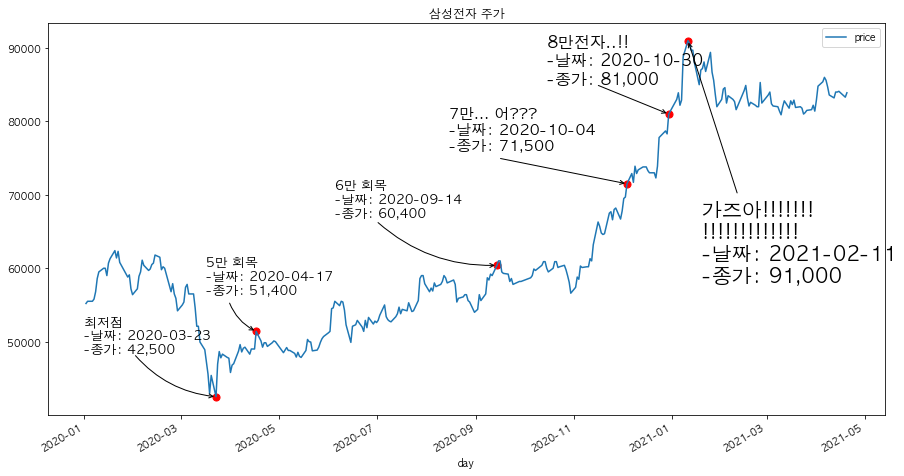

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
samsung_df.plot(ax=ax)

# 4만 최저점
ax.annotate('', xy=('2020-03-23' ,42500.0), xytext=('2020-02-01', 48300.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2020-01-01',48300, "최저점 \n-날짜: 2020-03-23 \n-종가: 42,500",fontsize=13)

# 5만
ax.annotate('', xy=('2020-04-17' ,51400.0), xytext=('2020-03-31', 55500),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2020-03-17',56400, "5만 회복 \n-날짜: 2020-04-17\n-종가: 51,400",fontsize=13)

# 6만
ax.annotate('', xy=('2020-09-14' ,60400.0), xytext=('2020-07-01', 66400),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2020-06-05',66900, "6만 회복 \n-날짜: 2020-09-14\n-종가: 60,400",fontsize=13)

# 7만
ax.annotate('', xy=('2020-12-04' ,71500.0), xytext=('2020-09-15', 75000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"),
           )

plt.text('2020-08-15',76000, "7만... 어??? \n-날짜: 2020-10-04\n-종가: 71,500",fontsize=15)

# 8만
ax.annotate('', xy=('2020-12-30' ,81000.0), xytext=('2020-11-15', 85000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"),
           )

plt.text('2020-10-15',85000, "8만전자..!! \n-날짜: 2020-10-30\n-종가: 81,000",fontsize=16)

# 9만
ax.annotate('', xy=('2021-01-11' ,91000.0), xytext=('2021-02-11', 70000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"),
           )

plt.text('2021-01-20',58000, "가즈아!!!!!!! \n!!!!!!!!!!!!! \n-날짜: 2021-02-11\n-종가: 91,000",fontsize=20)



# Scatter plot 추가
y1 = ['2020-03-23','2020-04-17' ,'2020-09-14','2020-12-04','2020-12-30','2021-01-11'] 
y2 = [42500,51400,60400,71500,81000,91000]


plt.scatter(y1,y2,s=50,color='r')

plt.title("삼성전자 주가")
plt.show()

## Step 2 예측 : 파이썬 라이브러리를 활용한 시세 예측
### Model 1: ARIMA
ARIMA는 전통적인 시계열 예측 방법. 
1. AR(Autoregression) 모델로 자기 자신의 과거를 정보로 사용.
2. MA(Moving Average) 모델로 '이번 항에서의 오차를 이용하여 현재 항의 상태를 추론하자'는 방법  


이 둘을 합한 것을 ARMA 모델이라 하고, ARMA에 추세 변동 경향성까지 반영한 것을 ARIMA라고 한다.

In [6]:
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [7]:
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [11]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 = 1, MA = 2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(samsung_train_df.price.values, order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  317
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2696.573
Date:                Fri, 07 Jan 2022   AIC                           5403.147
Time:                        00:01:02   BIC                           5421.925
Sample:                             0   HQIC                          5410.649
                                - 317                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0700      2.009      0.035      0.972      -3.867       4.007
ar.L2          0.7255      1.795      0.404      0.686      -2.792       4.243
ma.L1         -0.0566      2.031     -0.028      0.9

/Users/wooseokpark/miniforge3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wooseokpark/miniforge3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


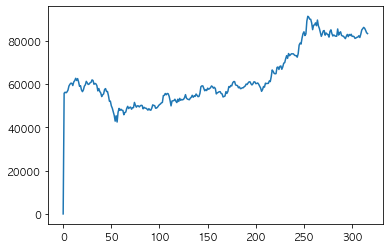

In [19]:
plt.plot(model_fit.predict())

<AxesSubplot:title={'center':'실제값과 예측값의 잔차'}>

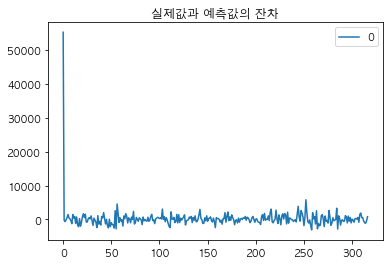

In [20]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='실제값과 예측값의 잔차')

ARIMA 모델의 평가 - 5일 동안의 미래를 테스트 데이터로 사용

In [27]:
forecast_data

array([84004.17532841, 84012.96286594, 84016.60684465, 84023.23701675,
       84026.34456312])

In [28]:
forecast_data = model_fit.forecast(steps=5)

# 마지막 5일간의 예측 데이터 (2021-04-15 ~ 2021-04-19)
# pred_arima_y = forecast_data[0].tolist()
pred_arima_y = forecast_data

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.price.values

# 마지막 5일의 예측 데이터 최소값, 최대값
pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

TypeError: 'numpy.float64' object is not iterable

In [25]:
forecast_data

array([84004.17532841, 84012.96286594, 84016.60684465, 84023.23701675,
       84026.34456312])

ARIMA 방법은 구현하기에 좀 어려움이 있었다. 호환성 문제인것 같다.

### Model 2: Facebook Prophet
Prophet 은 Additive 모델에 기반한 시계역 예측모델이고 트렌드성을 예측하는 것에 초점이 맞춰져 있다.
회귀 분석의 단점을 극복하기 위해 피쳐마다 비선형적인 적합을 가능하게 한다.

In [31]:
from fbprophet import Prophet

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['ds', 'y']

samsung_train_df = samsung_df[:317]
samsung_test_df = samsung_df[317:]


In [32]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(samsung_train_df)

Initial log joint probability = -3.94554
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1117.28     0.0616403       4326.85      0.6291           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1142.25    0.00510457       337.049           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1164.82    0.00062121       289.093           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1168.83     0.0120467       205.973       0.839       0.839      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1173.53   0.000639224       158.245           1           1      599   
    Iter      log prob        ||dx||      ||grad||       alpha  

  1174.48    0.00211721       569.477      0.2153           1      720   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       1174.99     9.417e-05       101.467           1           1      837   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       1175.64   0.000309683       115.359           1           1      956   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       1176.47     0.0010924       163.055      0.1892      0.9725     1078   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       1176.88    0.00278439       477.414       0.289           1     1200   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       1177.16    0.00643233       181.533           1           1     1326   
    Iter      log prob        |

In [33]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)

forecast_data[['ds','yhat','yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
317,2021-04-14,84834.047555,83281.835197,86488.489895
318,2021-04-15,84584.495934,82934.932871,86085.553851
319,2021-04-16,84283.983329,82599.239283,85895.456963
320,2021-04-17,75392.641147,73815.907125,77037.998336
321,2021-04-18,75075.918355,73286.585851,76670.630098


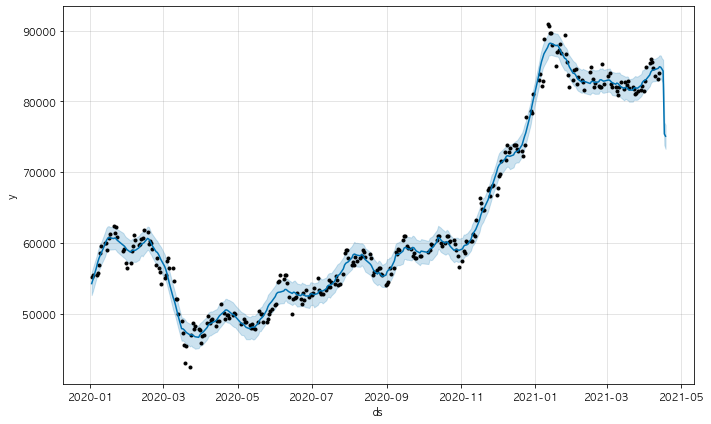

In [34]:
fig1 = prophet.plot(forecast_data)

fbprophet 에서 제공하는 트렌드 정보 시각화 그래프.  
이를 통해 시계열 데이터가 어떤 흐름을 가지고 변화하는지를 살펴볼 수 있다.  
전체적인 데이터의 트렌드는 아래 첫 번째 그래프.  
이어지는 그래프에서는 yearly, weekly, daily 순의 트렌드를 보여준다.


/Users/wooseokpark/miniforge3/envs/kaggle/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/Users/wooseokpark/miniforge3/envs/kaggle/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/Users/wooseokpark/miniforge3/envs/kaggle/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


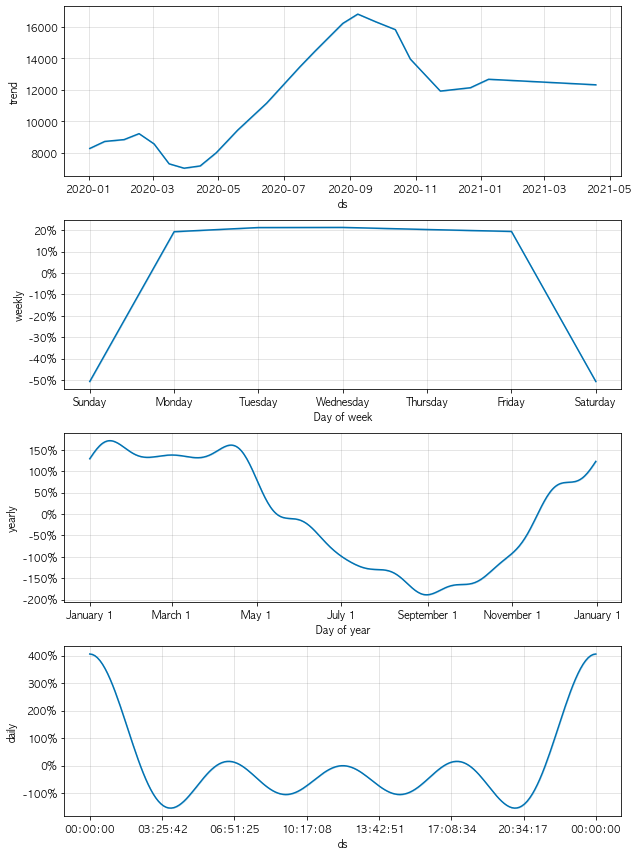

In [35]:
fig2 = prophet.plot_components(forecast_data)

### Testset 평가

Text(0.5, 1.0, '값 비교')

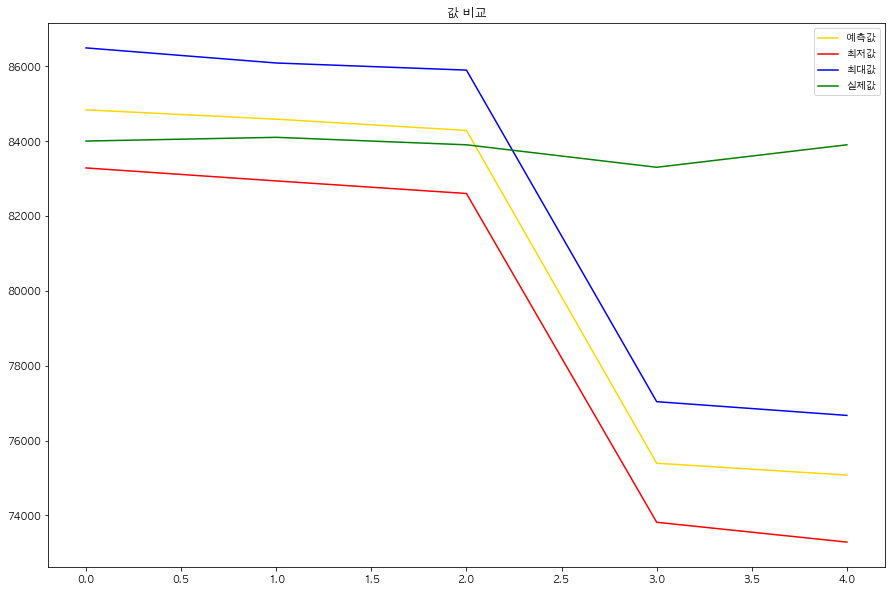

In [36]:
plt.figure(figsize=(15,10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]

# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color='gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값', '최대값', '실제값'])
plt.title("값 비교")

## Step 3 활용 : 더 나은 결과를 위한 방법

모델 성능 향상 방법 
### 1. 상한값 혹은 하한값 지정   
Prophet 모델에서 ['cap'] 을 이용해 상한선을 설정할 수 있다.

/var/folders/x2/cknq9hv17x34r_v1qbmvpgdh0000gn/T/ipykernel_7441/772525048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_train_df['cap'] = 90000


Initial log joint probability = -5.32535
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1089.24    0.00367656       129.399           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1131.15     0.0210757        225.45           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1136.64    0.00125854       79.1202           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1142.96     0.0030017       63.8347      0.3048      0.3048      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1147.72    0.00212802        83.686      0.9199      0.9199      599   
    Iter      log prob        ||dx||      ||grad||       alpha  

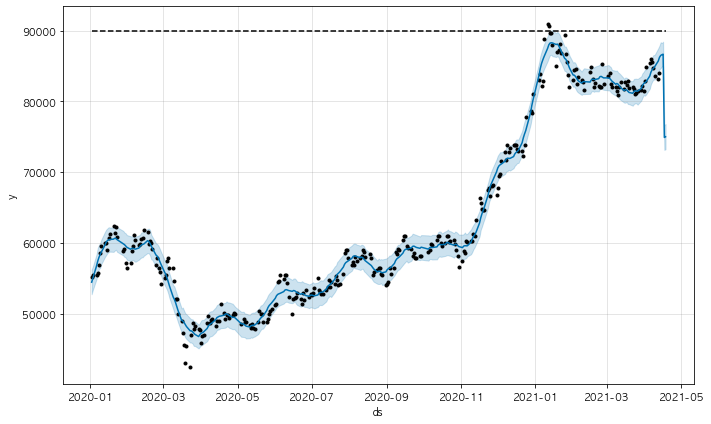

In [39]:
# 상한가 설정
samsung_train_df['cap'] = 90000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                  growth = 'logistic',
                  yearly_seasonality = True,
                  weekly_seasonality = True,
                  daily_seasonality = True,
                  changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df)

# 5일 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# 상한가 설정
future_data['cap'] = 90000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

### 2. 이상치 제거

이상치란 평균적인 수치에 비해 지나치게 높거나 낮은 수치의 데이터를 의미한다. 이상치에 해당하는 데이터를 None 으로 설정해주면 되고, 90000이 넘는 데이터를 이상치라고 설정해 주었다.

/Users/wooseokpark/miniforge3/envs/kaggle/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Initial log joint probability = -3.9831
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1126.76    0.00183594       236.545           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1143.08     0.0396739       470.445      0.5547      0.5547      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1157.68    0.00178209       484.897      0.2694      0.2694      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1161.67    0.00261465       460.762           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1165.62    0.00818582       694.719           1           1      612   
    Iter      log prob        ||dx||      ||grad||       alpha   

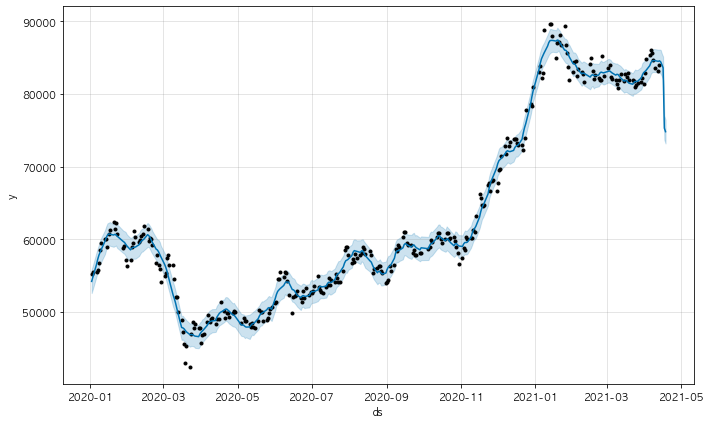

In [42]:
samsung_train_df.loc[samsung_train_df['y'] > 90000, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality = True,
                  daily_seasonality = True,
                  changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df)

# 5일 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')

forecast_data = prophet.predict(future_data)
fig = prophet.plot(forecast_data)


In [43]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]

## Step 4: Model 평가

각각의 모델이 삼성전자 주가를 어떻게 예측하는지 비교

RMSE

In [45]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   'FBprophet 이상치 제거 후(90000) 예측값':pred_fbprophet_y_1,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,FBprophet 이상치 제거 후(90000) 예측값,실제값
0,84004.175328,84834.047555,84431.580113,84000.0
1,84012.962866,84584.495934,84041.691249,84100.0
2,84016.606845,84283.983329,83605.204211,83900.0
3,84023.237017,75392.641147,75315.834991,83300.0
4,84026.344563,75075.918355,74826.404184,83900.0


모델별 예측값 시각화

ARIMA 모델이 가장 좋은 성능을 내고 있다.

Text(0.5, 1.0, '값 비교')

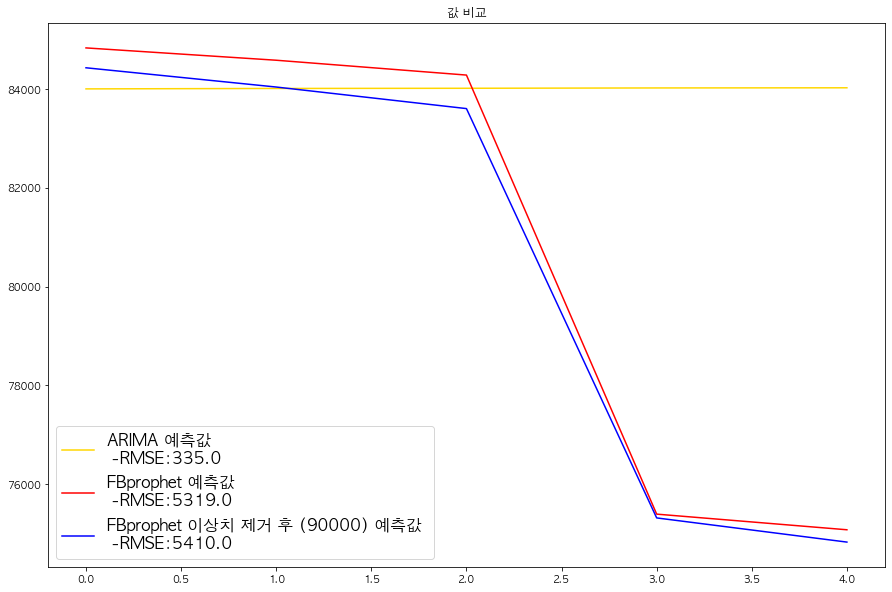

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15,10))

# arima 모델의 rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의 rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의 rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color='gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(df[['FBprophet 이상치 제거 후(90000) 예측값']], color='blue')

# 실제 가격 그래프
plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima, 0)),
            'FBprophet 예측값 \n -RMSE:' + str(round(rmse_fbprophet, 0)),
            'FBprophet 이상치 제거 후 (90000) 예측값 \n -RMSE:' + str(round(rmse_fbprophet_1, 0))])

plt.title('값 비교')


## 총평

bitcoin 시세 예측 자료를 응용해 삼성전자 주가를 예측해 보았다. ARIMA 보다 FBprophet이 더 좋은 성능을 낸다고 알고 
있지만 이 자료에서는 ARIMA가 더 좋은 결과를 보여준다.